Images contain a lot of information. However, due to the encoding an compression techniques, many details become unperceivable to the human eye. We use image enhancement techniques to make these details perceivable to the human eye.

Two techniques are explored in this notebook:
    1. Whitening
    2. Histogram Equalization    

In [1]:
# all imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Whitening
Image whitening can be thought of as image normalization. This helps in increasing the overall brightness of the image. Thus, the image, which previously was spanning only a small interval of spectrum, now will span the entire spectrum.

<class 'numpy.ndarray'> (147, 220)


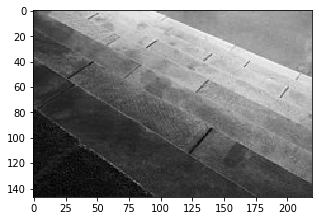

In [2]:
orig_image = cv2.imread("./steps-dark.jpg")

# convert the image to gayscale
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
print(type(orig_image), orig_image.shape)
plt.figure(figsize=(5,5))
plt.imshow(orig_image, cmap="gray")

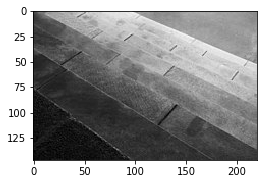

In [3]:
# get a new image for output
whiten_op = np.zeros(orig_image.shape, orig_image.dtype)

# perform whitening
mean_intensity = orig_image.mean()
std_dev_intensity = orig_image.std()
whiten_op = (orig_image - mean_intensity) / std_dev_intensity

# display image
plt.figure(figsize=(4,4))
plt.imshow(whiten_op, cmap="gray")

## Histogram Equalization
Many times the intensities in an image are unevenly spread. Using this transformation, the intensities are equally distributed. Histogram equalization spreads the bright intensities in an image over a larger intensity range, and hence increases the contrast of the image.

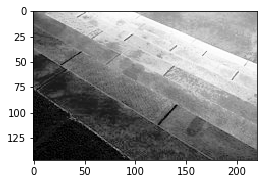

In [4]:
# get a new image for output
hist_eq_op = np.zeros(orig_image.shape, orig_image.dtype)

# perform equalization
hist = cv2.calcHist([orig_image], [0], None, [256], [0, 256])
cumulative_prop = np.zeros(hist.shape, np.float32)
roll_sum = 0.0
for i in range(256):
    roll_sum += hist[i]
    cumulative_prop[i] = roll_sum / (orig_image.shape[0] * orig_image.shape[1])

for i in range(orig_image.shape[0]):
    for j in range(orig_image.shape[1]):        
        hist_eq_op[i][j] = 255 * cumulative_prop[orig_image[i][j]]

plt.figure(figsize=(4,4))
plt.imshow(hist_eq_op, cmap="gray")

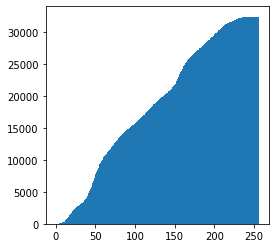

In [8]:
# plot histogram of original image
plt.figure(figsize=(4,4))
plt.hist(orig_image.ravel(),256,[0,256], cumulative=True)
plt.show()

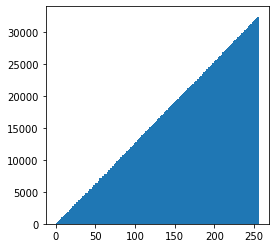

In [7]:
# plot histogram of output image
plt.figure(figsize=(4,4))
plt.hist(hist_eq_op.ravel(),256,[0,256], cumulative=True)
plt.show()